In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.potential import (
    LJ,
    DE,
)
from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH, PDB_PATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit
from ff_energy.plotting.plotting import set_style
from ff_energy.plotting.fit_results import residuals_plot, residuals_from_keys
from ff_energy.logs.logging import hide_logs
from ff_energy.ffe.potential import LJ, LJ_bound, DE

hide_logs()
import scienceplots
set_style(no_latex=True)

from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json
from ff_energy.ffe.structure import atom_key_pairs

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, \
    PKL_PATH, get_structures

from sklearn.metrics import mean_squared_error as calc_rmse


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

In [2]:
# PKLPATH = Path("/home/boittier/Documents/phd/ff_energy/pickles/")
# pd.read_csv(PKLPATH / "ELECmpol_water_cluster_lj_elec.csv")

#  Old FF objects

In [10]:
FFOBJ = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/ELECm_ions_ext_de_intE_fitted.pkl")

In [11]:
FFOBJ.bounds

[(0.1, 5.5),
 (0.1, 5.5),
 (0.1, 5.5),
 (0.1, 5.5),
 (0.001, 0.1),
 (0.001, 0.1),
 (0.001, 0.1),
 (0.001, 0.1),
 (1, 8),
 (6, 20)]

In [12]:
FFOBJ.atom_types

['CLA', 'HT', 'OT', 'POT']

In [13]:
FFOBJ.get_best_parm()

array([1.95202633e+00, 5.01141786e+00, 1.48646675e+00, 8.80240644e-01,
       9.82542068e-02, 1.00111229e-03, 2.13264856e-02, 9.95209274e-02,
       1.59275155e+00, 1.20273520e+01])

In [14]:
FFOBJ.elec = "ELECp"
FFOBJ.set_targets()

In [15]:
ljpcff_fit = fit_repeat(FFOBJ,
             10,
             "test",
             loss="jax_de",
            quiet=False)

loss:  jax_de
(<bound method FF.get_loss_jax_de of FF: DE ions_ext ELECp Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax_de of FF: DE ions_ext ELECp Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax_de
bounds: [(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (1, 8), (6, 20)]
maxfev: 10000
initial guess: [4.7111071624462015, 3.343173297981803, 3.88851613230458, 2.013728102444161, 0.08050019500375573, 0.08237043380290418, 0.08900297232826802, 0.0964731701415412, 4.429849126537551, 17.700816887834186]
final_loss_fn:  21.550626754760742
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 21.550626754760742
             x: [ 2.923e+00  2.648e+00  1.687e+00  1.671e+00  1.293e-02
                  9.970e-02  7.085e-02  9.647e-02  1.577e+00  8.202e+00]
           nit: 850
          nfev: 1400
 final_simplex: (array([[ 2.923e+00,  2.648e

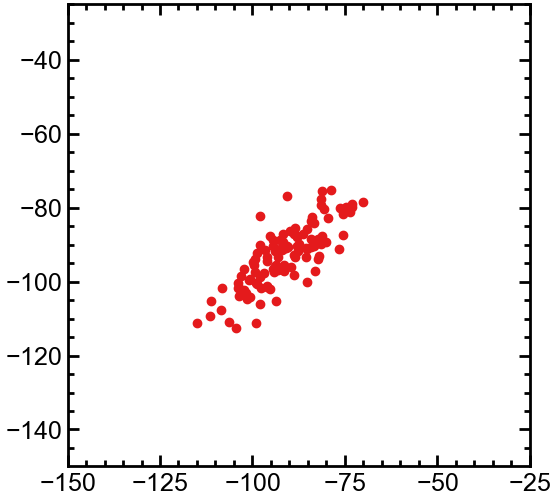

In [6]:
plt.scatter(FFOBJ.targets + FFOBJ.data.ELECp, 
            FFOBJ.opt_results_df[0][0] + FFOBJ.data.ELECp)
plt.xlim(-150, -25.0)
plt.ylim(-150, -25.0)
plt.gca().set_aspect('equal')

In [7]:
pd.DataFrame(FFOBJ.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
59,21.293474,2764,4132,0,True,Optimization terminated successfully.,"[1.8987096310556173, 2.4990461237807917, 1.463...","([[1.8987096310556173, 2.4990461237807917, 1.4..."
67,21.325718,1457,2170,0,True,Optimization terminated successfully.,"[1.8437766596387055, 2.5178014686773826, 1.463...","([[1.8437766596387055, 2.5178014686773826, 1.4..."
80,21.400326,1394,2155,0,True,Optimization terminated successfully.,"[0.49418883008838216, 1.5902162860805293, 2.52...","([[0.49418883008838216, 1.5902162860805293, 2...."
98,21.406542,1121,1773,0,True,Optimization terminated successfully.,"[0.49046442029146986, 1.5885663543745598, 2.52...","([[0.49046442029146986, 1.5885663543745598, 2...."
35,21.441751,1858,2808,0,True,Optimization terminated successfully.,"[0.48778869497028976, 1.593110347305247, 2.540...","([[0.48778869497028976, 1.593110347305247, 2.5..."
...,...,...,...,...,...,...,...,...
54,96.949478,457,721,0,True,Optimization terminated successfully.,"[0.1, 1.9152931995952827, 0.1, 0.1, 0.09999999...","([[0.1, 1.9152931995952827, 0.1, 0.1, 0.099999..."
62,126.291237,123,313,0,True,Optimization terminated successfully.,"[0.1553102393015169, 0.12751455672334974, 0.11...","([[0.1553102393015169, 0.12751455672334974, 0...."
33,126.291275,109,263,0,True,Optimization terminated successfully.,"[0.1, 0.1, 0.1, 0.1, 0.09888102637195578, 0.09...","([[0.1, 0.1, 0.1, 0.1, 0.09888102637195578, 0...."
21,126.291328,104,267,0,True,Optimization terminated successfully.,"[0.1, 0.1, 0.1, 0.1, 0.09565930501794412, 0.1,...","([[0.1, 0.1, 0.1, 0.1, 0.09565930501794412, 0...."


In [130]:
just_cl_data = FFOBJ.data[FFOBJ.data["ion"] == "CLA"].copy()
# just_cl_data

In [132]:
just_cl_dists = {k:v for k, v in FFOBJ.dists.items() if k.upper() in list(FFOBJ.data[FFOBJ.data["ion"] == "CLA"].index)}

In [66]:
# dists = {str(s.name)[:-4]: s.distances for s in structs}

struct_data = structs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [67]:
# data_.loc[names]
LJ_bound

[(0.05, 4.0), (0.05, 4.0), (1e-05, 1.0), (1e-05, 1.0)]

In [134]:
TESTCLA_ljpcff = FF(
    just_cl_data, # pd.DataFrame
    just_cl_dists, #
    FUNC, #
    [(0,1) for _ in range(6)], # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(just_cl_data)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['HT', 'OT', 'CLA']
Atom types: ['CLA', 'HT', 'OT']
Atom types: ['CLA', 'HT', 'OT']
Atom type pairs: [('CLA', 'CLA'), ('CLA', 'HT'), ('CLA', 'OT'), ('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
setting random parameters
Getting 6 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
37_13_CLA_15_1    -90.762046
37_14_CLA_16_1    -94.321714
37_15_CLA_17_1    -92.993648
37_16_CLA_18_1    -93.963950
37_17_CLA_19_1    -81.485406
37_1_CLA_0_1      -94.082692
37_20_CLA_22_1    -80.715397
37_24_CLA_26_1    -87.907096
37_26_CLA_28_1    -90.459383
37_27_CLA_29_1    -93.958810
37_28_CLA_30_1    -81.425668
37_2_CLA_1_1      -91.606534
37_31_CLA_33_1    -99.141452
37_34_CLA_36_1    -93.553569
37_35_CLA_37_1   -101.432503
37_36_CLA_38_1    -91.730880
37_37_CLA_39_1   -103.206918
37_3_CLA_2_1     -103.656361
37_4_CLA_3_1      -76.374532
37_6_CLA_6_1      -99.650614
37_7_CLA_7_1      -92.394778
37_8_CLA_9_1      -98.85

In [135]:
TESTCLA_ljpcff_fit = fit_repeat(TESTCLA_ljpcff,
             2,
             "test",
             loss="jax",
            quiet=False)

loss:  jax
(<bound method FF.get_loss_jax of FF: LJ cla_test ELEC Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax of FF: LJ cla_test ELEC Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax
bounds: [(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
maxfev: 10000
initial guess: [4.6163894509782555, 4.374783557514275, 2.2258072336685633, 0.0810762791285713, 0.09237340900913917, 0.03373357559321487]
final_loss_fn:  37.21937942504883
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 37.21937942504883
             x: [ 9.291e-01  1.183e+00  1.000e-01  1.000e-03  9.783e-02
                  6.879e-02]
           nit: 378
          nfev: 658
 final_simplex: (array([[ 9.291e-01,  1.183e+00, ...,  9.783e-02,
                         6.879e-02],
                       [ 9.291e-01,  1.183e+00, ...,  9.783e-02,
                         6.879e-02],
                    

In [91]:
ljpcff_fit = fit_repeat(FFOBJ,
             2,
             "test",
             loss="jax",
            quiet=False)

loss:  jax
(<bound method FF.get_loss_jax of FF: LJ ions_ext ELECp Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax of FF: LJ ions_ext ELECp Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax
bounds: [(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
maxfev: 10000
initial guess: [3.4652391246397944, 3.2888019491247564, 4.372501797271171, 3.0193531467534083, 0.06343752992218595, 0.015743305921289155, 0.08933572208943609, 0.04627245991088882]
final_loss_fn:  31.59855079650879
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 31.59855079650879
             x: [ 1.000e-01  6.951e-01  7.628e-01  2.662e+00  9.900e-02
                  1.000e-03  9.981e-02  1.000e-03]
           nit: 743
          nfev: 1180
 final_simplex: (array([[ 1.000e-01,  6.951e-01, ...,  9.981e-02,
                         1.000e-03],
                       [ 1.0

(array([ 4.,  8., 17., 27., 23., 10.,  9.,  6.,  6.,  4.]),
 array([-2.0932007,  0.5673912,  3.227983 ,  5.888575 ,  8.549167 ,
        11.209759 , 13.870351 , 16.530943 , 19.191534 , 21.852127 ,
        24.512718 ], dtype=float32),
 <BarContainer object of 10 artists>)

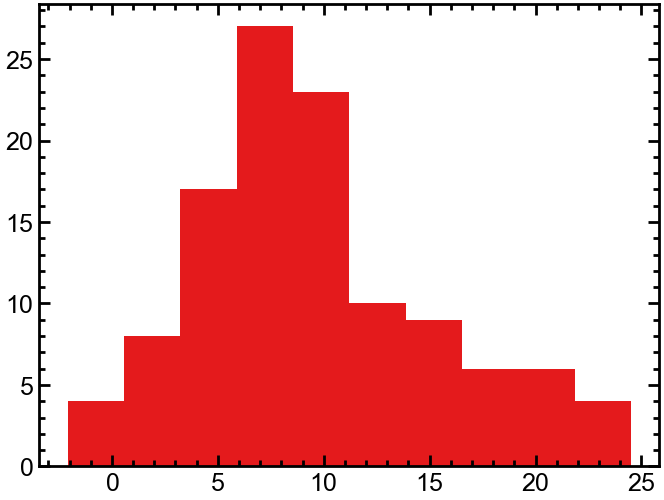

In [9]:
plt.hist(FFOBJ.targets)

# Mike's Data

In [58]:
polE = [-0.414108045672691,
-3.18751925572136,
-0.135589440516043,
-6.50420378424246,
-5.08720706684926,
-0.847746264614244,
-2.88719922192413,
1.23023692162019,
2.34732370863043,
2.42284220912128,
0.918818910952268,
-7.02516712813826,
-2.94324580629078,
-1.90211349555901,
1.40281740816175,
0.533864995459993,
-3.80231412297786,
-2.13240211849146,
0.085510269966079,
-0.34770746468962,
# 2.12613296059692,
# -0.247729935513746,
# 1.47343723895722,
# 3.18660071579751,
# -1.45335918792424,
# 1.25973868174952,
# 1.6957922311253,
# -1.51233214772702,
# 1.37607082667697,
# 3.27774245735662,
# -2.53773459790372
       ]

In [59]:
ciE = [-172.294748700473,
-162.753901968924,
-161.600709456013,
-177.597983623278,
-195.571327086928,
-157.175740278685,
-173.45650867918,
-179.84902864648,
-160.935151740573,
-167.504171516421,
-163.12057492246,
-188.237766971484,
-177.5333343772,
-173.981065221248,
-178.015983956155,
-177.969325403712,
-178.345772709696,
-173.566174889506,
-151.980813822351,
-144.433456643724,
# -156.096085287681,
# -164.732736539375,
# -173.57415384982,
# -157.751438562752,
# -176.33060276309,
# -162.167001889172,
# -141.865838628083,
# -144.00915397662,
# -156.640545132153,
# -159.762448589636,
# -160.441112581321,
      ]

#  New structures

In [60]:
data = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/cla_test_pbe0dz_pc.pkl")

In [61]:
data_ = data.data
data_.index = data_.KEY

In [62]:
structure = "cla_test"
structs, _ = get_structures(structure,
                            pdbpath=PDB_PATH / structure)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 20 20


In [63]:
data_.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294
CLA_10_10,23.76114,-105.44607,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452
CLA_11_11,19.03492,-114.50993,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831
CLA_12_12,20.67121,-106.28946,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443
CLA_13_13,21.81382,-108.63187,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226
CLA_14_14,19.22999,-112.99155,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341
CLA_15_15,21.41101,-113.25211,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013
CLA_16_16,18.92466,-119.65307,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266
CLA_17_17,22.28554,-113.36461,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934


In [65]:
names = ["CLA_0_0",
"CLA_1_1",
"CLA_2_2",
"CLA_3_3",
"CLA_4_4",
"CLA_5_5",
"CLA_6_6",
"CLA_7_7",
"CLA_8_8",
"CLA_9_9",
"CLA_10_10",
"CLA_11_11",
"CLA_12_12",
"CLA_13_13",
"CLA_14_14",
"CLA_15_15",
"CLA_16_16",
"CLA_17_17",
"CLA_18_18",
"CLA_19_19",
# "CLA_20_20",
# "CLA_21_21",
# "CLA_22_22",
# "CLA_23_23",
# "CLA_24_24",
# "CLA_25_25",
# "CLA_26_26",
# "CLA_27_27",
# "CLA_28_28",
# "CLA_29_29",
# "CLA_30_30",
        ]

In [136]:
dists = {str(s.name)[:-4]: s.distances for s in structs}

struct_data = structs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [137]:
# data_.loc[names]
LJ_bound

[(0.05, 4.0), (0.05, 4.0), (1e-05, 1.0), (1e-05, 1.0)]

In [138]:
ljpcff = FF(
    data_, # pd.DataFrame
    dists, #
    FUNC, #
    [(0,1) for _ in range(6)], # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(data_)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['HT', 'OT', 'CLA']
Atom types: ['CLA', 'HT', 'OT']
Atom types: ['CLA', 'HT', 'OT']
Atom type pairs: [('CLA', 'CLA'), ('CLA', 'HT'), ('CLA', 'OT'), ('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
setting random parameters
Getting 6 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
CLA_0_0     -103.415858
CLA_10_10    -97.952108
CLA_11_11   -109.426257
CLA_12_12   -103.105382
CLA_13_13   -105.199648
CLA_14_14   -102.499032
CLA_15_15   -107.613520
CLA_16_16   -110.163762
CLA_17_17   -107.292879
CLA_18_18    -94.664299
CLA_19_19    -92.021307
CLA_1_1     -112.650048
CLA_2_2     -106.141266
CLA_3_3     -107.818300
CLA_4_4     -110.380281
CLA_5_5     -109.112675
CLA_6_6     -109.481339
CLA_7_7     -101.390303
CLA_8_8     -100.377068
CLA_9_9      -96.752736
Name: intE, dtype: float64
count     20.000000
mean    -104.372903
std        5.730573
min     -112.650048
25%     -109.191071
50%     -105.670457
75%   

In [50]:
# a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])
# a,b,c = ljpcff.eval_jax([ 0.1, 0.1, 0.36058475, 1.74046017,])

In [69]:
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT

[1.89870963e+00, 2.49904612e+00, 1.46393915e+00, 9.00892334e-01,
1.00000000e-03, 1.00067511e-03, 1.17324839e-03, 5.23727070e-03]

[1.89870963,
 2.49904612,
 1.46393915,
 0.900892334,
 0.001,
 0.00100067511,
 0.00117324839,
 0.0052372707]

In [140]:
# tip3
# a,b,c = ljpcff.eval_jax([ 
#         0.2245,
#         1.7682, 
#         0.0460, 
#         0.1521, 
# ])
a,b,c = ljpcff.eval_jax(
[
1.995e+00,  2.799e-01,  8.725e-01,
    1.000e-03,  3.201e-03, 1.000e-01
]
                         )

In [141]:
a

Array([16.75119  , 13.521822 ,  7.6254873,  8.986406 ,  9.4086275,
       11.71035  , 11.571306 ,  8.633214 ,  9.127433 ,  8.516343 ,
       11.131572 ,  7.2838845, 11.022581 , 10.680679 , 11.072377 ,
        6.7290416,  7.3492866, 11.46611  ,  7.99077  , 11.721117 ],      dtype=float32)

In [105]:
a_,b_,c_ = FFOBJ.eval_jax([1.89870963e+00, 2.49904612e+00, 1.46393915e+00, 9.00892334e-01,
       1.00000000e-03, 1.00067511e-03, 1.17324839e-03, 5.23727070e-03])
a_

Array([22.574469 ,  9.074636 ,  4.4700484, 10.86132  ,  5.4801106,
        9.125593 ,  6.385825 , 10.304658 , 12.070015 , 11.072428 ,
       10.490596 ,  9.2500725,  6.8061547,  5.4968524,  6.5320992,
       11.321433 ,  7.654702 ,  8.20705  ,  7.861574 , 10.807115 ,
        8.380394 , 10.494856 ,  7.2589536,  7.0949106,  9.432262 ,
        9.39661  ,  9.156191 , 13.356741 , 10.230818 ,  5.528767 ,
        7.0893636, 11.368005 , 10.532068 ,  8.139096 ,  8.087753 ,
        7.9359336,  7.63169  , 10.937242 , 19.063187 ,  7.53798  ,
        6.30353  ,  4.741537 ,  7.581398 ,  5.7388086, 12.800904 ,
       10.104998 ,  9.749247 ,  7.861291 ,  7.0116105, 10.876724 ,
       10.852463 ,  5.640131 , 23.695873 ,  7.0165815, 10.525339 ,
       12.360449 , 12.818221 ,  8.865872 ,  9.8312645,  8.041536 ,
       11.501702 ,  5.6431456, 11.104328 , 10.7884   ,  5.6160274,
        5.5148787,  8.847982 , 16.636469 , 11.564121 ,  4.6252246,
        9.637035 , 12.14283  , 10.477562 ,  7.9174285, 11.5150

In [106]:
ljpcff.targets

Array([12.620491 ,  7.4939575,  5.083679 ,  3.1840744,  3.4322205,
       10.492516 ,  5.6385956,  9.489304 ,  6.0717316,  5.444504 ,
        5.4553604, -4.2818756,  3.667076 ,  8.121002 ,  7.428581 ,
       -2.1667023,  3.52993  , 11.360535 ,  6.273575 , 10.9291   ],      dtype=float32)

(array([1., 1., 0., 0., 4., 4., 4., 1., 3., 2.]),
 array([-4.2818756, -2.591639 , -0.9014023,  0.7888344,  2.4790711,
         4.1693077,  5.8595443,  7.549781 ,  9.240018 , 10.930254 ,
        12.620491 ], dtype=float32),
 <BarContainer object of 10 artists>)

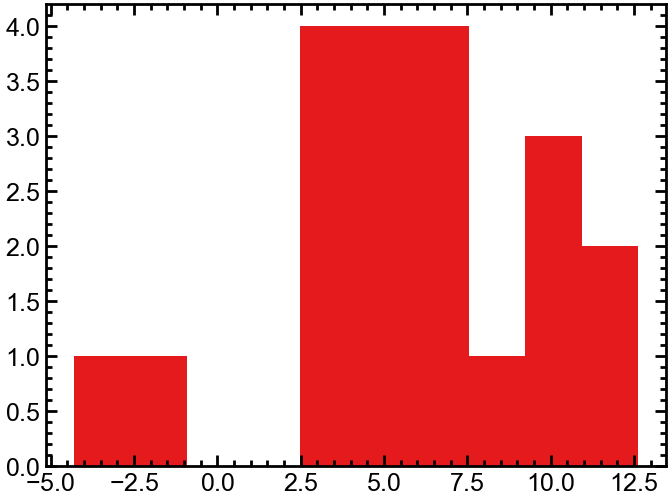

In [107]:
plt.hist(ljpcff.targets)

In [108]:
# datacopy.loc[names]

In [144]:
datacopy = ljpcff.data.copy()
datacopy["fitE"] = a
datacopy["target"] = ljpcff.targets
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,16.751190,12.620491
CLA_10_10,23.76114,-105.44607,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452,0.0,13.521822,7.493958
CLA_11_11,19.03492,-114.50993,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831,0.0,7.625487,5.083679
CLA_12_12,20.67121,-106.28946,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443,0.0,8.986406,3.184074
CLA_13_13,21.81382,-108.63187,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226,0.0,9.408628,3.432220
CLA_14_14,19.22999,-112.99155,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341,0.0,11.710350,10.492516
CLA_15_15,21.41101,-113.25211,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013,0.0,11.571306,5.638596
CLA_16_16,18.92466,-119.65307,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266,0.0,8.633214,9.489304
CLA_17_17,22.28554,-113.36461,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934,0.0,9.127433,6.071732


In [145]:
datacopy = datacopy.loc[names]
datacopy["EPOL"] = polE
datacopy["ECI"] = ciE

In [146]:
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target,EPOL,ECI
KEY,,,,,,,,,,,,,,
CLA_0_0,19.12459,-116.03635,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,16.751190,12.620491,-0.414108,-172.294749
CLA_1_1,20.36153,-108.36817,11.14480,CLA_1_1,-1376.414230,13,-1376.593751,-112.650048,-863816.708521,0.0,7.283885,-4.281876,-3.187519,-162.753902
CLA_2_2,21.07822,-109.80834,13.49791,CLA_2_2,-1376.412568,13,-1376.581717,-106.141266,-863809.157156,0.0,11.022581,3.667076,-0.135589,-161.600709
CLA_3_3,20.85204,-115.93930,21.04250,CLA_3_3,-1376.407986,13,-1376.579808,-107.818300,-863807.959015,0.0,10.680679,8.121002,-6.504204,-177.597984
CLA_4_4,18.55940,-117.80886,23.59448,CLA_4_4,-1376.417115,13,-1376.593019,-110.380281,-863816.249189,0.0,11.072377,7.428581,-5.087207,-195.571327
CLA_5_5,19.37182,-106.94598,8.11314,CLA_5_5,-1376.418301,13,-1376.592185,-109.112675,-863815.725720,0.0,6.729042,-2.166702,-0.847746,-157.175740
CLA_6_6,19.92805,-113.01127,15.31569,CLA_6_6,-1376.415945,13,-1376.590417,-109.481339,-863814.616301,0.0,7.349287,3.529930,-2.887199,-173.456509
CLA_7_7,17.62951,-112.75084,20.39198,CLA_7_7,-1376.421728,13,-1376.583305,-101.390303,-863810.153688,0.0,11.466110,11.360535,1.230237,-179.849029
CLA_8_8,18.95077,-106.65064,11.49119,CLA_8_8,-1376.416586,13,-1376.576549,-100.377068,-863805.914133,0.0,7.990770,6.273575,2.347324,-160.935152


In [147]:
# np.sqrt(calc_rmse(
#     ljpcff.data.intE,
#     a + ljpcff.data.ELEC
# ))

np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
))


58.675255322639565

In [148]:
np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ELEC
))

5.112031932499787

In [149]:
np.std(datacopy.intE - (datacopy.fitE + datacopy.ELEC))

2.982803037324559

In [150]:
np.sqrt(calc_rmse(FFOBJ.data.intE, a_ + FFOBJ.data.ELECp))

4.614485217401197

In [151]:
np.std(FFOBJ.data.intE - ( a_ + FFOBJ.data.ELECp))

4.614295452128199

Text(0, 0.5, 'FF ENERGY [kcal/mol]')

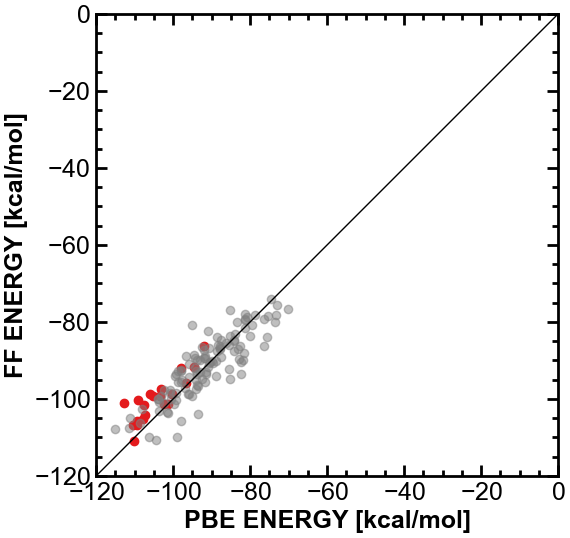

In [152]:
plt.scatter(
          datacopy.intE,
    datacopy.fitE + datacopy.ELEC
           )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECp,  c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
# plt.savefig("water_ci_test.png")

In [35]:
datacopy.ELEC + datacopy.EPOL

KEY
test0    -118.862363
test1    -127.525264
test2    -123.624245
test3    -123.658581
test4     -94.142098
test5    -138.048353
test6    -140.140754
test7    -102.955511
test8    -128.956009
test9    -119.479721
test10   -132.643511
test11   -124.962830
test12   -102.917665
test13   -116.993678
test14   -111.887659
test15   -112.025413
test16   -130.456218
test17    -98.583588
test18   -116.141396
test19   -124.857491
dtype: float64

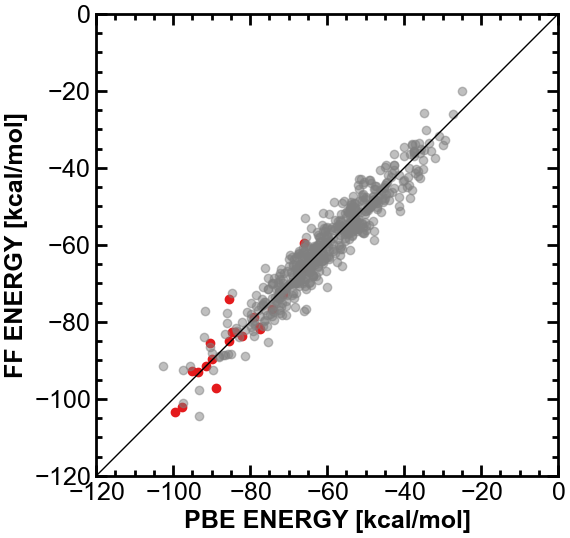

In [37]:
plt.scatter(datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
            )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECpol, c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pol_test.png")